#### In this module we load the data from the persistent storage  and then we create a web-based dashboard that holds various visualizations of our data. 

### Import Libraries

In [1]:
#to work with dataframe
import pandas as pd
#to perform mathematical and statistical calculations
import numpy as np

#for interactive graphs/visualization
#plotly express
import plotly.express as px
#plotly graphical object
import plotly.graph_objects as go
#to work with dashboards
from jupyter_dash import JupyterDash
#import dash core components
from dash import dcc
from dash.dependencies import Input,Output,State
#to create html objects
from dash import html
import datetime

### Fetch Stock Market Data for both Tesla and Ford from MongoDb Database

In [2]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [3]:
#for other python modules to main module/file
import import_ipynb

In [4]:
#import storage module to main module
import DEF_MFS_MVP_Storage as storage_module
import DEF_MFS_MVP_Timeseries_Forcasting as forecast

importing Jupyter notebook from DEF_MFS_MVP_Storage.ipynb
importing Jupyter notebook from DEF_MFS_MVP_Timeseries_Forcasting.ipynb


In [5]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [8]:
#connect to mongodb database 
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
#for Tesla database
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [9]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)
df_from_db_tesla

,_id,Date,Open,High,Low,Close,Volume
0,63f68ef66d7d6e5cb7e3b996,2021-01-04,239.820007,248.163330,239.063339,243.256668,145914600
1,63f68ef66d7d6e5cb7e3b997,2021-01-05,241.220001,246.946671,239.733337,245.036667,96735600
2,63f68ef66d7d6e5cb7e3b998,2021-01-06,252.830002,258.000000,249.699997,251.993332,134100000
3,63f68ef66d7d6e5cb7e3b999,2021-01-07,259.209991,272.329987,258.399994,272.013336,154496700
4,63f68ef66d7d6e5cb7e3b99a,2021-01-08,285.333344,294.829987,279.463318,293.339996,225166500
...,...,...,...,...,...,...,...
498,63f68ef66d7d6e5cb7e3bb88,2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700
499,63f68ef66d7d6e5cb7e3bb89,2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400
500,63f68ef66d7d6e5cb7e3bb8a,2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500
501,63f68ef66d7d6e5cb7e3bb8b,2022-12-29,120.389999,123.570000,117.500000,121.820000,221923300


In [10]:
#for Ford database
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [11]:
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)
df_from_db_ford

,_id,Date,Open,High,Low,Close,Volume
0,63f68efb6d7d6e5cb7e3bb8d,2021-01-04,7.985667,8.012860,7.641223,7.722802,85043100
1,63f68efb6d7d6e5cb7e3bb8e,2021-01-05,7.677481,7.904089,7.668416,7.840638,70127800
2,63f68efb6d7d6e5cb7e3bb8f,2021-01-06,7.967539,8.103503,7.867831,8.012860,72590200
3,63f68efb6d7d6e5cb7e3bb90,2021-01-07,8.103502,8.230403,8.049117,8.212275,77117100
4,63f68efb6d7d6e5cb7e3bb91,2021-01-08,8.248532,8.284789,8.058181,8.157888,59162200
...,...,...,...,...,...,...,...
498,63f68efb6d7d6e5cb7e3bd7f,2022-12-23,10.601654,10.723943,10.554619,10.686316,38200700
499,63f68efb6d7d6e5cb7e3bd80,2022-12-27,10.611060,10.714538,10.469956,10.535805,44837400
500,63f68efb6d7d6e5cb7e3bd81,2022-12-28,10.516991,10.582840,10.253596,10.300631,49375400
501,63f68efb6d7d6e5cb7e3bd82,2022-12-29,10.422921,10.865049,10.394700,10.855641,53550300


### Logic For Forecasting using Facebook Prophet

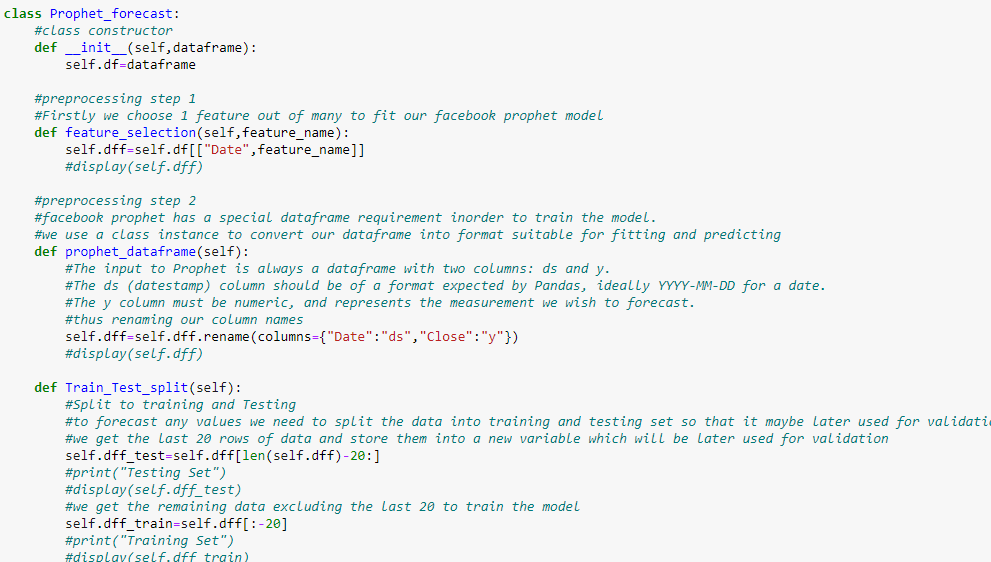

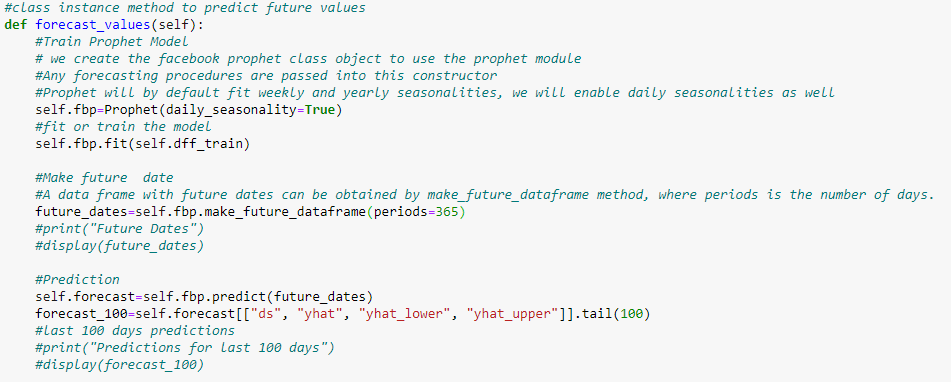

### Main Class to Generate Demo on Plotly Dash

In [12]:
#class to generate predictions and used them to genrate our Plotly Dash application showcasing the demo of our product
class Interactive_Dash:
    
    #class constructor
    def __init__(self,df_tesla,df_ford):
        self.df_tesla=df_tesla
        self.df_ford=df_ford
    
    def get_predictions(self):
        #we will be using the module DEF_MFS_MVP_TimeseriesForecasting for forecasting
        #we will use this class instance method to get stock predictions using the DEF_MFS_MVP_TimeseriesForecasting Module
        #one fuction to forecast stocks of any company
        def predict_stocks(data):
            #first create  a class object
            pred=forecast.Prophet_forecast(data)
            #select features as close
            pred.feature_selection("Close")
            #change dataframe format into suitable format of columns ds and y
            pred.prophet_dataframe()
            #split data into training an testing
            pred.Train_Test_split()
            #get forecasted value
            pred.forecast_values()
            #we will be returning actual data points, predicted data points and the prophet model
            return pred.dff,pred.forecast[["ds","yhat","yhat_lower","yhat_upper"]],pred.fbp
        #for tesla stock
        self.df_tesla_actual,self.df_tesla_pred,self.tesla_model=predict_stocks(self.df_tesla)
        #for ford stock
        self.df_ford_actual,self.df_ford_pred,self.ford_model=predict_stocks(self.df_ford)
        #display(self.df_tesla_actual)
        ##display(self.df_ford_actual)
        #display(self.df_tesla_pred)
        #display(self.df_ford_pred)
    
    
    def create_merge_table(self):
        #in this class instance we will merge actual stock prices with the predicted stock prices into one table
        #we will use merge function
        self.tesla_stocks=pd.merge(self.df_tesla_actual,self.df_tesla_pred, on = "ds", how = "inner")
        self.ford_stocks=pd.merge(self.df_ford_actual,self.df_ford_pred, on = "ds", how = "inner")
        #display(self.tesla_stocks)
        #display(self.ford_stocks)
        #the merged dataframe will be later used to create graphs is dash application
        
    def Dash_Stocks(self):
        
        #create dash application
        app = JupyterDash(__name__)
        
        #to describe what app looks like we setup its layout
        #html.Div-our main container
        app.layout =html.Div([
            #this div is to display the heading of our app- Time Series Analysis - Demo'
            html.Div([
                #html header
                html.H1('Time Series Analysis - Demo',style={'text-align':'center'}),
                html.Br(),
                html.Br(),
            ]),
            #this div is to integrate and show dropdowns in our add- Select Ticker and Dropdown
            html.Div([
                #html paragraph
                html.P("Select Ticker:"),
                #dash core components- dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
                #to enable dropdowns in dash
                dcc.Dropdown(
                    id = 'graph-type',
                    #title
                    placeholder='Select Stock',
                    #options to choose from
                    options= [
                        {'label' : 'Tesla', 'value' : 'Tesla'},
                        {'label' : 'Ford', 'value' : 'Ford'}
                    ],
                    #default value when app starts
                    value="Tesla",
                    style={"width":"30%","color":"black"}
                ),
                #line break
                html.Br(),
            ]),
            #this div is used to plot candlestick plots based on the tickers selected on dropdown menu
            html.Div([
                html.H2("Candlestick Plot"),
                # to render candlestick data visualization
                dcc.Graph(
                    id='candle-graph',
                ),
                html.Br(),
                html.Br(),
                
            ]),
            
            #this div is used to plot graph for actual stock data and predicted stock data along with checklist to select from
            html.Div([
                html.H2("Actual Vs Predictions"),
                # to render any plotly-powered data visualization
                dcc.Graph(
                    id='graph'
                ),
                html.Br(),
                #P object for paragraph-"Select Values" which gets rendered by dash as html element
                html.P("Select Feature Values to Display:"),
                dcc.Checklist(
                    #we define a list of options to choose from
                    options=[
                        {"label": "HISTORIC    ", "value": "y"},
                        {"label": "PREDICTED    ", "value": "yhat"},
                        {"label": "PREDICTED UPPER    ", "value": "yhat_upper"},
                        {"label": "PREDICTED LOWER    ", "value": "yhat_lower"},
                        
                    ],
                    value=["y"],
                    id="checklist",
                    #labelStyle={'display': 'block'},
                ),
                html.Br(),
                html.Br(),
            ]),
            
            #this div is used to show prediction in table format or predictions in graph format for 3 years by click of a button
            html.Div([
                #html header
                html.H2('Show Predictions for 3 Years',style={'text-align':'left'}),
                #add button to generate table
                html.Button('Display Table ', id='table-button',n_clicks=0,style={'height': '100px', 'width': '100px'}),
                #add button to generate output
                html.Button('Display Graph', id='graph-button',n_clicks=0,style={'height': '100px', 'width': '100px'}),
                #the output generated when a button is pressed
                html.Div(id='output'),
                html.Br(),
                html.Br(),
            ]),
            #this div is used to display a prediction made for a certain day.
            html.Div([
                html.H2("Forecasting For Any Date"),
                #to enter date when the prediction is to be made
                dcc.Input(id='input-date', type='text',
                          value=datetime.datetime.today().strftime('%Y-%m-%d'),
                          style={'height': '60px', 'width': '100px'},
                         ),
                #button to generate prediction of that date
                html.Button('Submit', id='submit-button',n_clicks=0,
                           style={'height': '60px', 'width': '100px'},
                           ),
                html.Br(),
                html.Br(),
                #prediction made when button is pressed
                html.Div(id='output-div', children='',style={"font-size":"20px"}),
                html.Br(),
                html.Br(),
                html.Br(),
                html.Br(),
                
            ])
            
        ],
        #overall page background color and text color    
        style={'backgroundColor': '#111111' ,'color': "white"}
            )
        
        
        
        
        #to plot candlestick plot
        @app.callback(
            #what is to be displayed/altered
            Output('candle-graph', 'figure'),
            #what inputs affects the output
            [Input('graph-type', 'value')]
        )
        def choose_graph_type(graph_type):
            #logic is we first check which stock to work with, then plot candlestick using the actual values of that stock retrieved from database
            if graph_type is None:
                raise dash.exceptions.PreventUpdate()
            if graph_type == 'Tesla':
                #will plot candlestick graph of tesla
                fig = go.Figure(data=[go.Candlestick(x=self.df_tesla['Date'],
                                             open=self.df_tesla['Open'],
                                             high=self.df_tesla['High'],
                                             low=self.df_tesla['Low'],
                                             close=self.df_tesla['Close'])])
                fig.update_layout(xaxis_title=" Date",yaxis_title="Stock Market Prices")
                fig.update_layout(template="plotly_dark")
                return fig
            elif graph_type == 'Ford':
                #will plot candlestick graph of ford
                fig = go.Figure(data=[go.Candlestick(x=self.df_ford['Date'],
                                             open=self.df_ford['Open'],
                                             high=self.df_ford['High'],
                                             low=self.df_ford['Low'],
                                             close=self.df_ford['Close'])])
                fig.update_layout(xaxis_title=" Date",yaxis_title="Stock Market Prices")
                fig.update_layout(template="plotly_dark")
                return fig
            return None
        
        
        
        
        
        
        
        #to plot actual vs predictions
        @app.callback(
            #what is to be displayed
            Output('graph', 'figure'),
            #what inputs affects the output
            [Input('graph-type', 'value'),Input('checklist', 'value')]
        )
        def choose_graph_type(graph_type,checklist):
            #logic is we first see which stock is to work with, and then based on that plot the actual datapoints and the predictions 
            #generated by facebook prophet whist training with that actual points
            if graph_type is None:
                raise dash.exceptions.PreventUpdate()
            if graph_type == 'Tesla':
                fig=px.line(self.tesla_stocks, x='ds', y=checklist)
                fig.update_layout(template="plotly_dark")
                return fig
            elif graph_type == 'Ford':
                fig=px.line(self.ford_stocks, x='ds', y=checklist)
                fig.update_layout(template="plotly_dark")
                return fig
            return None
        
        
        
        
        
        
        #to display table and figure in click of a button
        @app.callback(
            #what is to be displayed/altered
            Output('output', 'children'),
            #what inputs affects the output
            [Input('table-button', 'n_clicks'),Input('graph-button', 'n_clicks'),Input('graph-type', 'value'),]
        )
        def display_output(table_clicks, graph_clicks,graph_type):
            #logic is to check stock and generate either prediction table or prediction graph based on which  buttons are clicked
            def stock_selection(graph_type):
                if graph_type is None:
                    raise dash.exceptions.PreventUpdate()
                if graph_type == 'Tesla':
                    return self.df_tesla_pred
                elif graph_type == 'Ford':
                    return self.df_ford_pred
                return None
            df_stock=stock_selection(graph_type)
            
            if table_clicks==0 and graph_clicks==0:
                return ''
            elif table_clicks >graph_clicks:
                return dcc.Graph(
                    id='table',
                    figure={
                        'data': [go.Table(
                            header=dict(values=list(df_stock.columns)),
                            cells=dict(values=[df_stock[col] for col in df_stock.columns])),
                                ],
    
                    }
                )
            else :
                return dcc.Graph(
                    
                    id='graph-predict',
                    figure={
                        'data': [go.Scatter(x=df_stock['ds'], y=df_stock['yhat'])],
                        'layout': go.Layout(
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Predicted stock Market Prices'},
                            template="plotly_dark",
                        )
                    }
                )
            #elif graph_clicks is not None and table_clicks is not None and graph_clicks>table_clicks
            
            
            
            
            
        #to generate predictions based on date entered    
        @app.callback(
            #what is to be displayed/altered
            Output('output-div', 'children'),
            #what inputs affects the output
            [Input('submit-button', 'n_clicks')],
            #latest value
            [State('input-date', 'value'),State('graph-type', 'value'),]
        )
        def update_output_div(n_clicks, date_value,graph_type):
            #logic is that will check ticker, then fetch the date from user when prediction is to be made , then uses prophet to forecast
            if n_clicks:
                if graph_type is None:
                    raise dash.exceptions.PreventUpdate()
                if graph_type == 'Tesla':
                    forecast_value = float(self.tesla_model.predict(pd.DataFrame({'ds':[date_value]}))["yhat"])
                    return f"The forecasted value for {date_value} is {forecast_value}"
                
                elif graph_type == 'Ford':
                    forecast_value = float(self.ford_model.predict(pd.DataFrame({'ds':[date_value]}))["yhat"])
                    return f"The forecasted value for {date_value} is {forecast_value}"
                
                return graph_type
                
            else:
                return ''

    



        app.run_server(debug=True)

In [13]:
#create class object to work with class instance method
INT=Interactive_Dash(df_from_db_tesla,df_from_db_ford)

In [14]:
#perform forecasting using facebook prophet
#logic used from TimeSeries_Forecasting
INT.get_predictions()

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [15]:
#actual tesla stock prices
INT.df_tesla_actual

,ds,y
0,2021-01-04,243.256668
1,2021-01-05,245.036667
2,2021-01-06,251.993332
3,2021-01-07,272.013336
4,2021-01-08,293.339996
...,...,...
498,2022-12-23,123.150002
499,2022-12-27,109.099998
500,2022-12-28,112.709999
501,2022-12-29,121.820000


In [17]:
#predicted stock prices for tesla
INT.df_tesla_pred

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-04,265.756912,225.169004,305.708346
1,2021-01-05,264.194368,228.677076,302.500732
2,2021-01-06,264.471863,226.976165,305.106484
3,2021-01-07,262.720899,225.255187,304.129431
4,2021-01-08,261.496491,220.985694,300.337366
...,...,...,...,...
843,2023-11-27,90.676382,-37.078586,219.757175
844,2023-11-28,89.126023,-33.466183,224.251209
845,2023-11-29,89.415703,-38.273619,215.434194
846,2023-11-30,87.676925,-38.445227,221.299830


In [18]:
#actual ford stock prices
INT.df_ford_actual

,ds,y
0,2021-01-04,7.722802
1,2021-01-05,7.840638
2,2021-01-06,8.012860
3,2021-01-07,8.212275
4,2021-01-08,8.157888
...,...,...
498,2022-12-23,10.686316
499,2022-12-27,10.535805
500,2022-12-28,10.300631
501,2022-12-29,10.855641


In [19]:
#predicted stock prices for ford
INT.df_ford_pred

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-04,9.615132,8.080147,11.280736
1,2021-01-05,9.676726,8.220423,11.140731
2,2021-01-06,9.708943,8.193393,11.251672
3,2021-01-07,9.723423,8.214341,11.270669
4,2021-01-08,9.739359,8.181630,11.306143
...,...,...,...,...
843,2023-11-27,14.252750,3.208213,25.527152
844,2023-11-28,14.302972,3.775759,25.471472
845,2023-11-29,14.323818,3.361222,25.622148
846,2023-11-30,14.326927,3.085596,25.723696


In [20]:
#we use this function to mergeactual prices with predicted prices.
#this table will be used in displaying graphs
INT.create_merge_table()

In [23]:
#tesla actual and predicted stock prices
INT.tesla_stocks

,ds,y,yhat,yhat_lower,yhat_upper
0,2021-01-04,243.256668,265.756912,225.169004,305.708346
1,2021-01-05,245.036667,264.194368,228.677076,302.500732
2,2021-01-06,251.993332,264.471863,226.976165,305.106484
3,2021-01-07,272.013336,262.720899,225.255187,304.129431
4,2021-01-08,293.339996,261.496491,220.985694,300.337366
...,...,...,...,...,...
498,2022-12-23,123.150002,206.904959,164.133412,246.191457
499,2022-12-27,109.099998,207.108316,168.258070,245.520472
500,2022-12-28,112.709999,207.397996,167.239387,250.088714
501,2022-12-29,121.820000,205.659217,164.453158,248.071306


In [24]:
#ford actual and predicted stock prices
INT.ford_stocks

,ds,y,yhat,yhat_lower,yhat_upper
0,2021-01-04,7.722802,9.615132,8.080147,11.280736
1,2021-01-05,7.840638,9.676726,8.220423,11.140731
2,2021-01-06,8.012860,9.708943,8.193393,11.251672
3,2021-01-07,8.212275,9.723423,8.214341,11.270669
4,2021-01-08,8.157888,9.739359,8.181630,11.306143
...,...,...,...,...,...
498,2022-12-23,10.686316,12.894259,11.237521,14.329450
499,2022-12-27,10.535805,12.895071,11.285248,14.420499
500,2022-12-28,10.300631,12.915917,11.357485,14.408768
501,2022-12-29,10.855641,12.919026,11.177063,14.455027


In [25]:
#this class method will be used to generate interactive dash dashboard which is hosed locally
INT.Dash_Stocks()

Dash app running on http://127.0.0.1:8050/


### Output
Dropdown menu . Two choices tesla and Ford
#this will be used to select which stock to visualize and predict

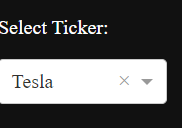

Candlestick Plot for Tesla


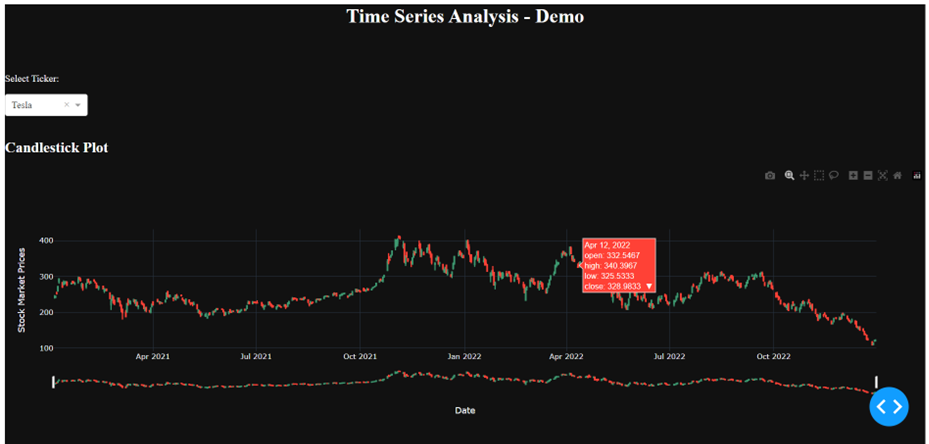


Candlestick plot zoomed in showing candles

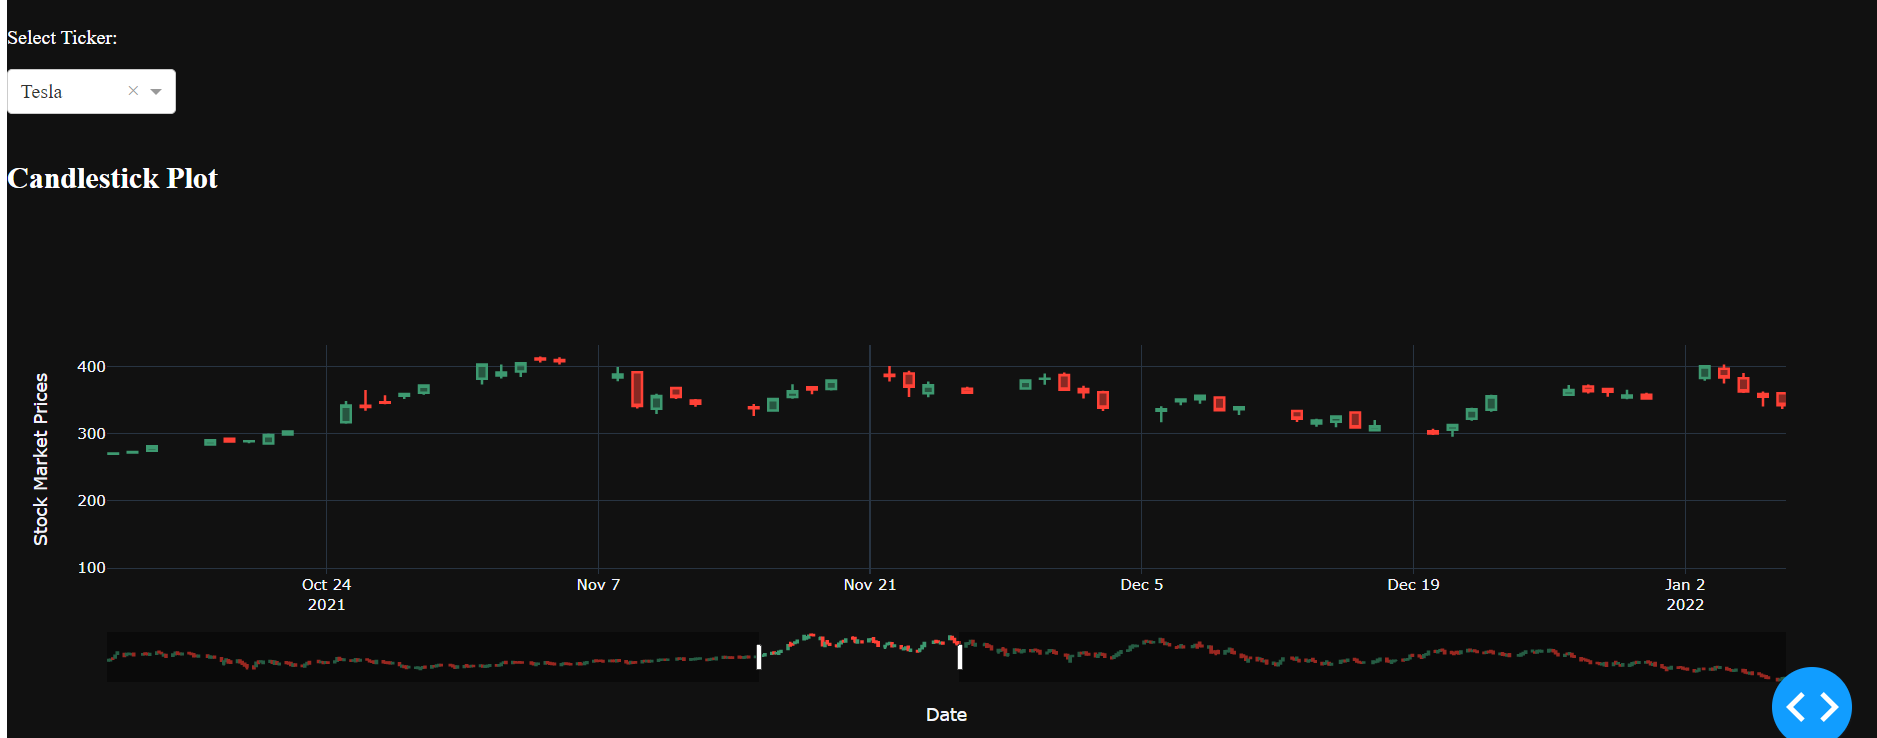

when dropdown option ford is selected

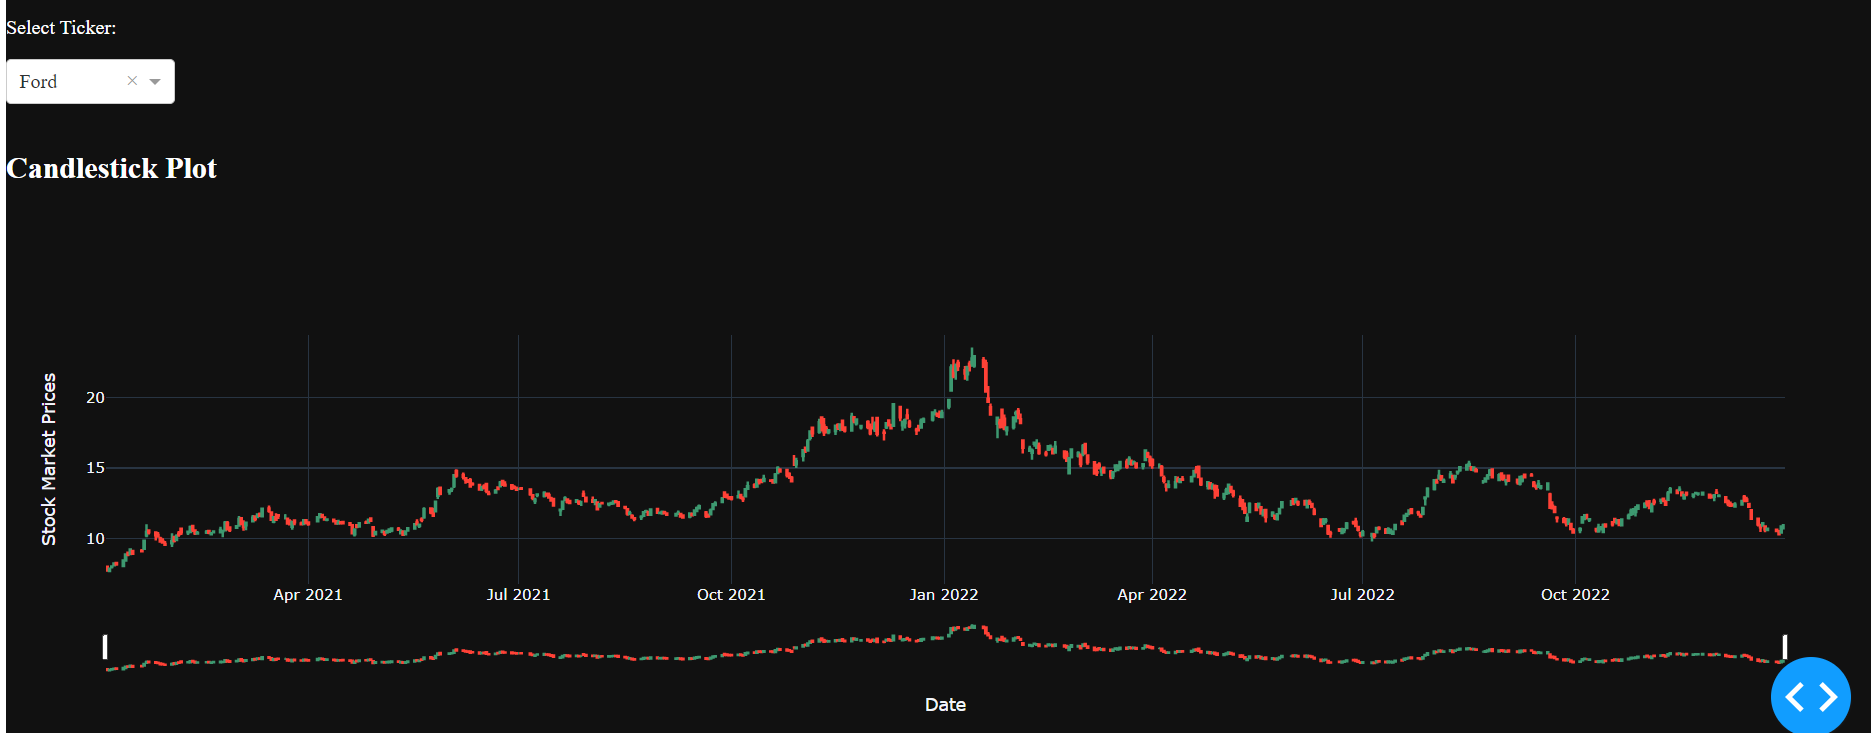

Actual vs predicted values

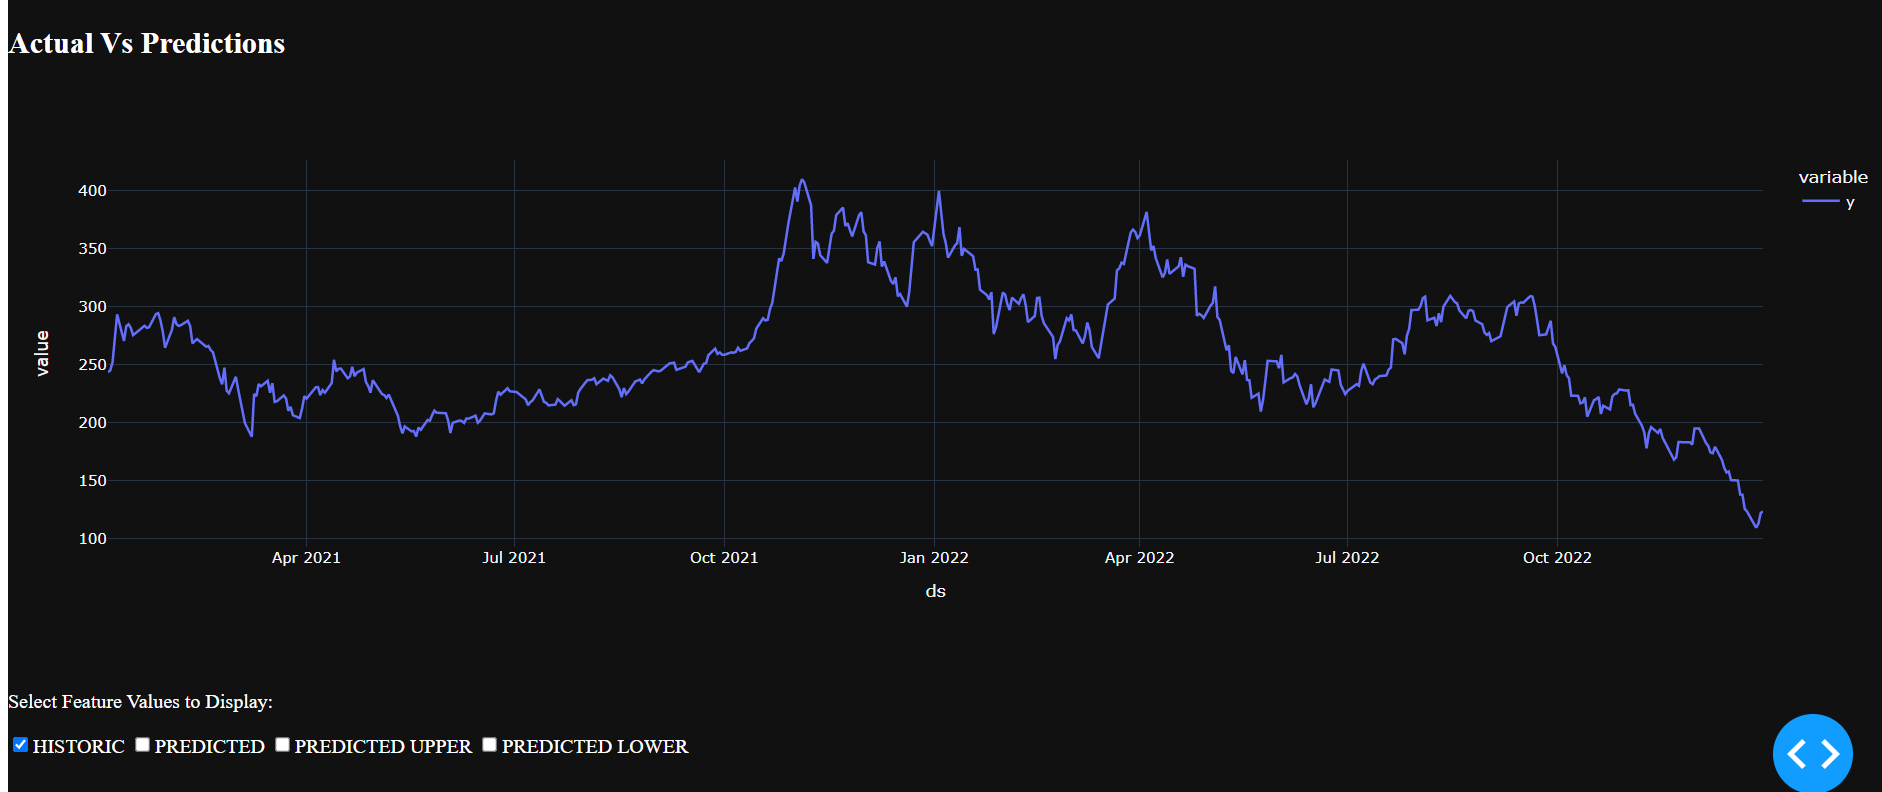

predicted values displayed when checklist options selected

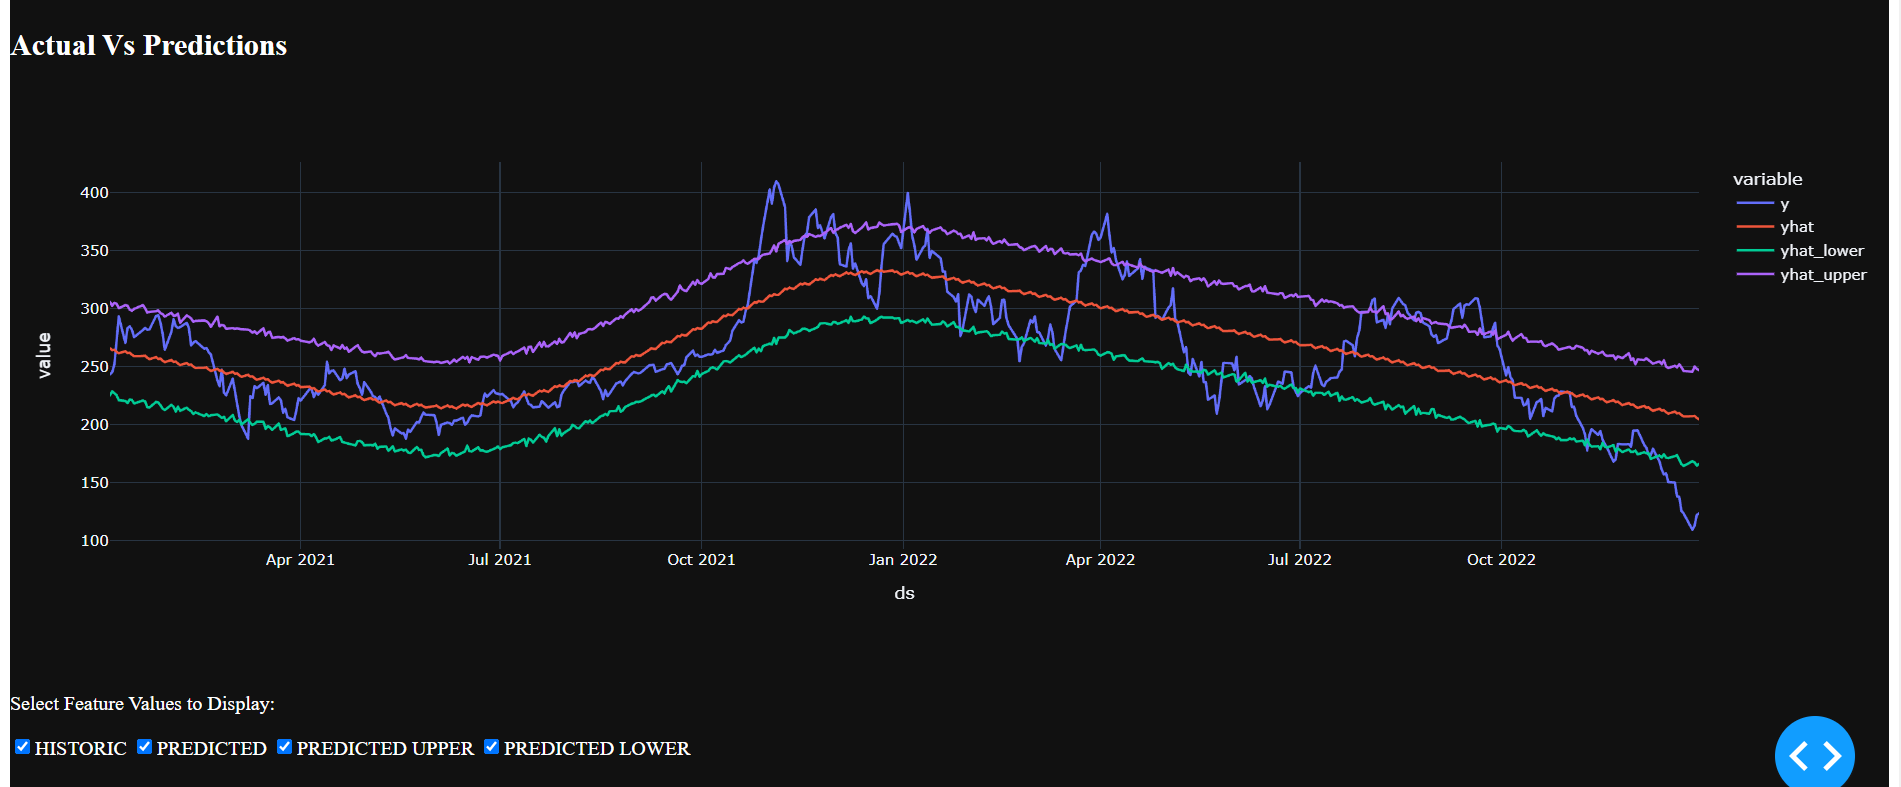

Similarly for ford


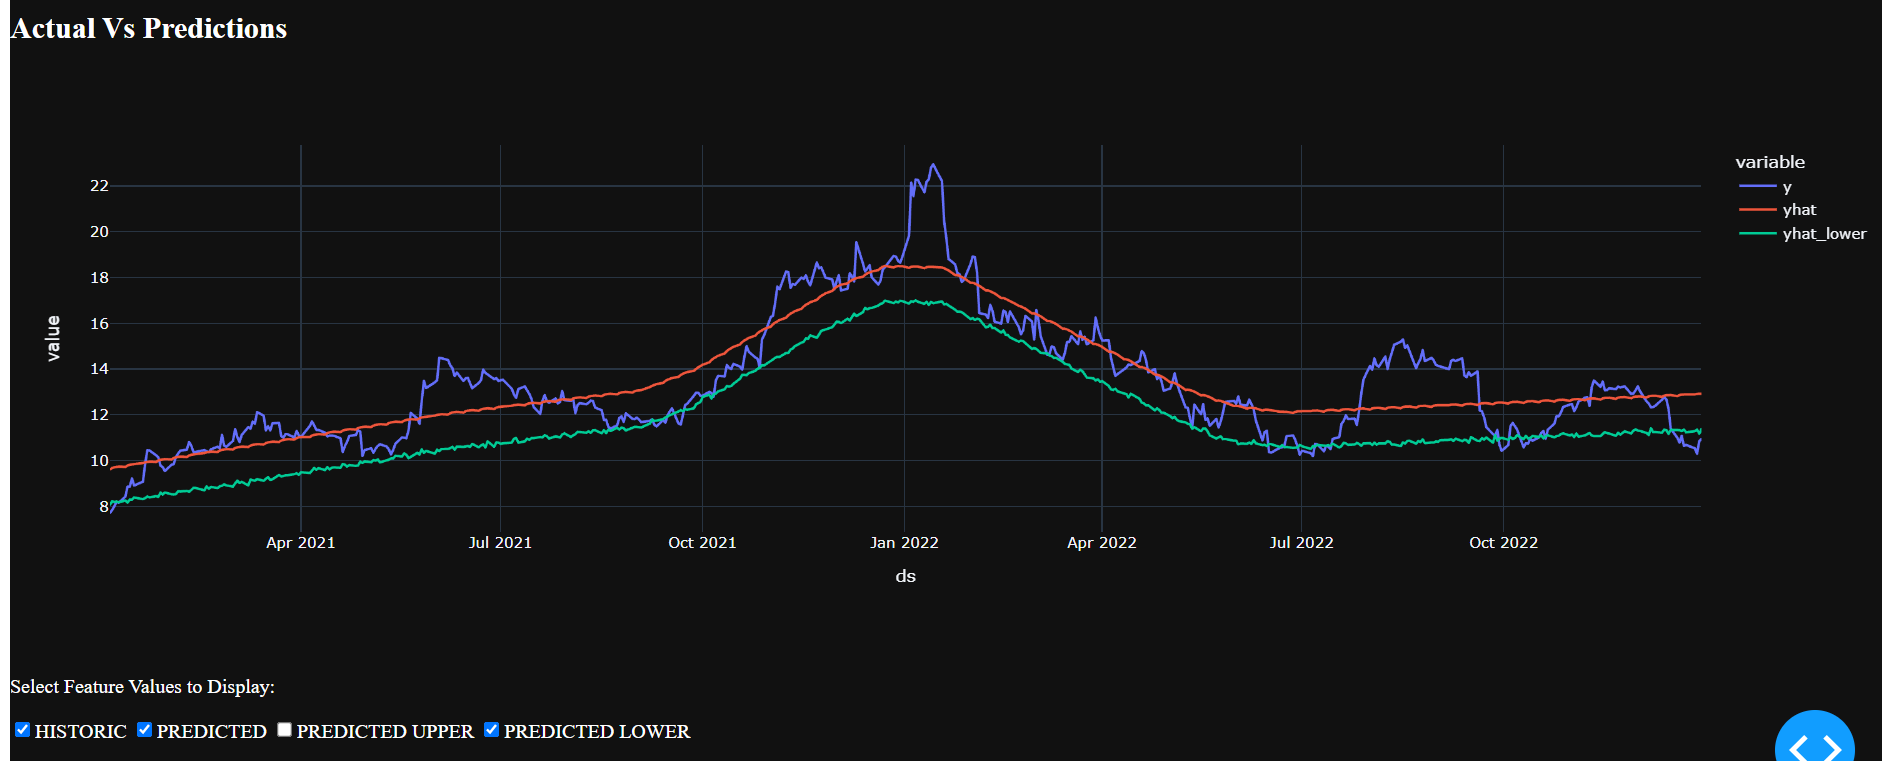


Buttons to generate list of predictions for three years represented in tabular and graphical format


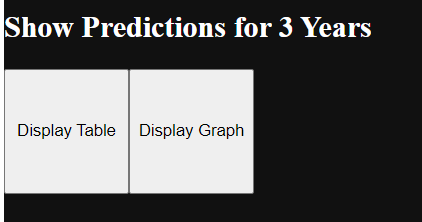

when Display table  button  pressed

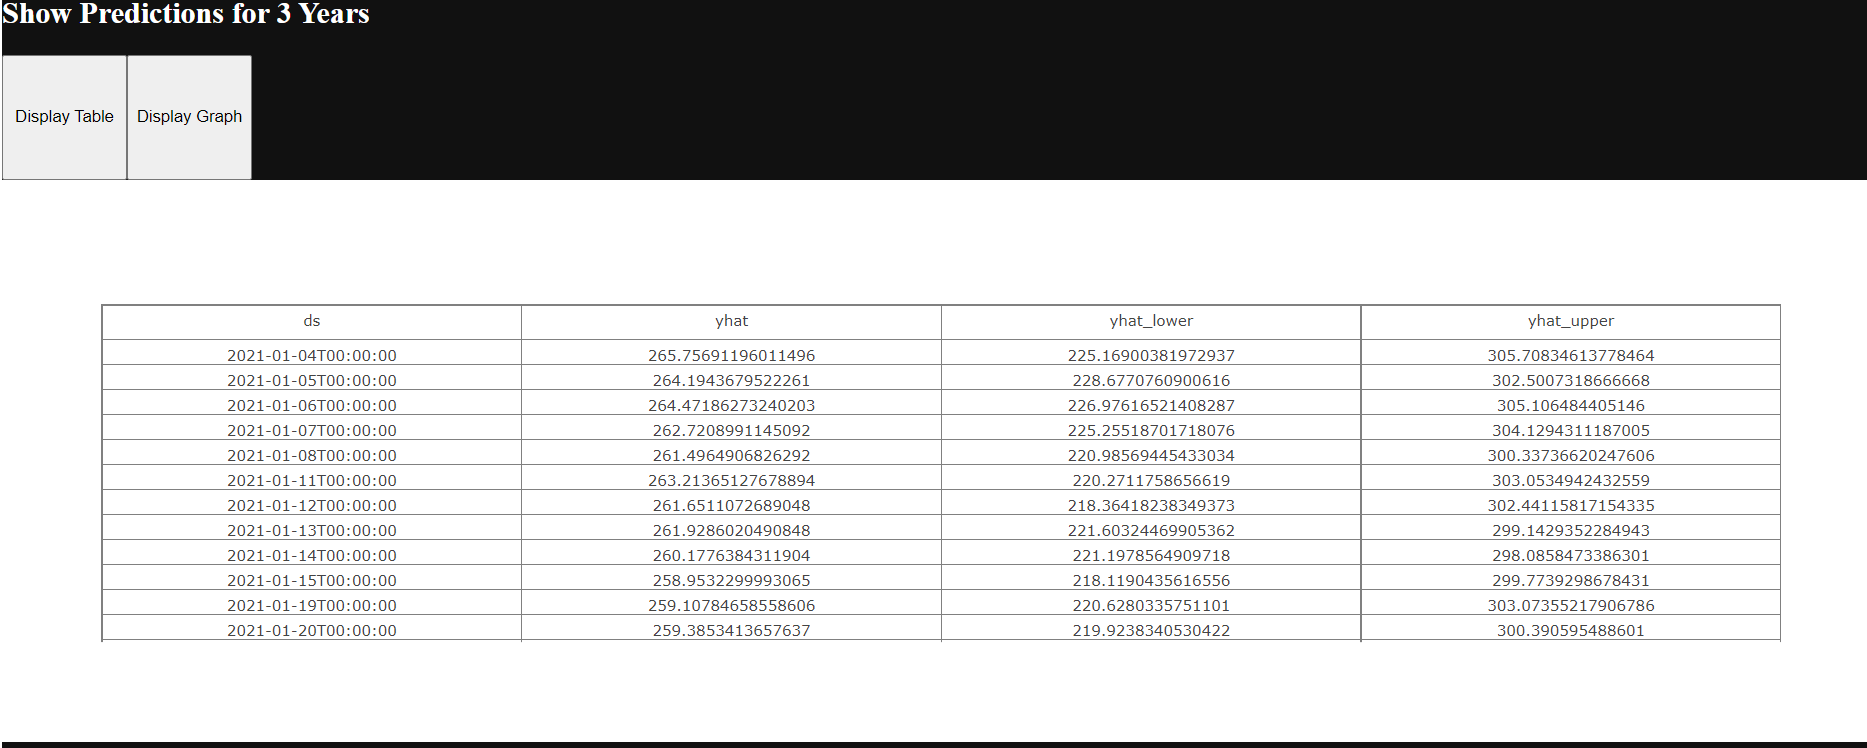

when dispay grapgh pressed


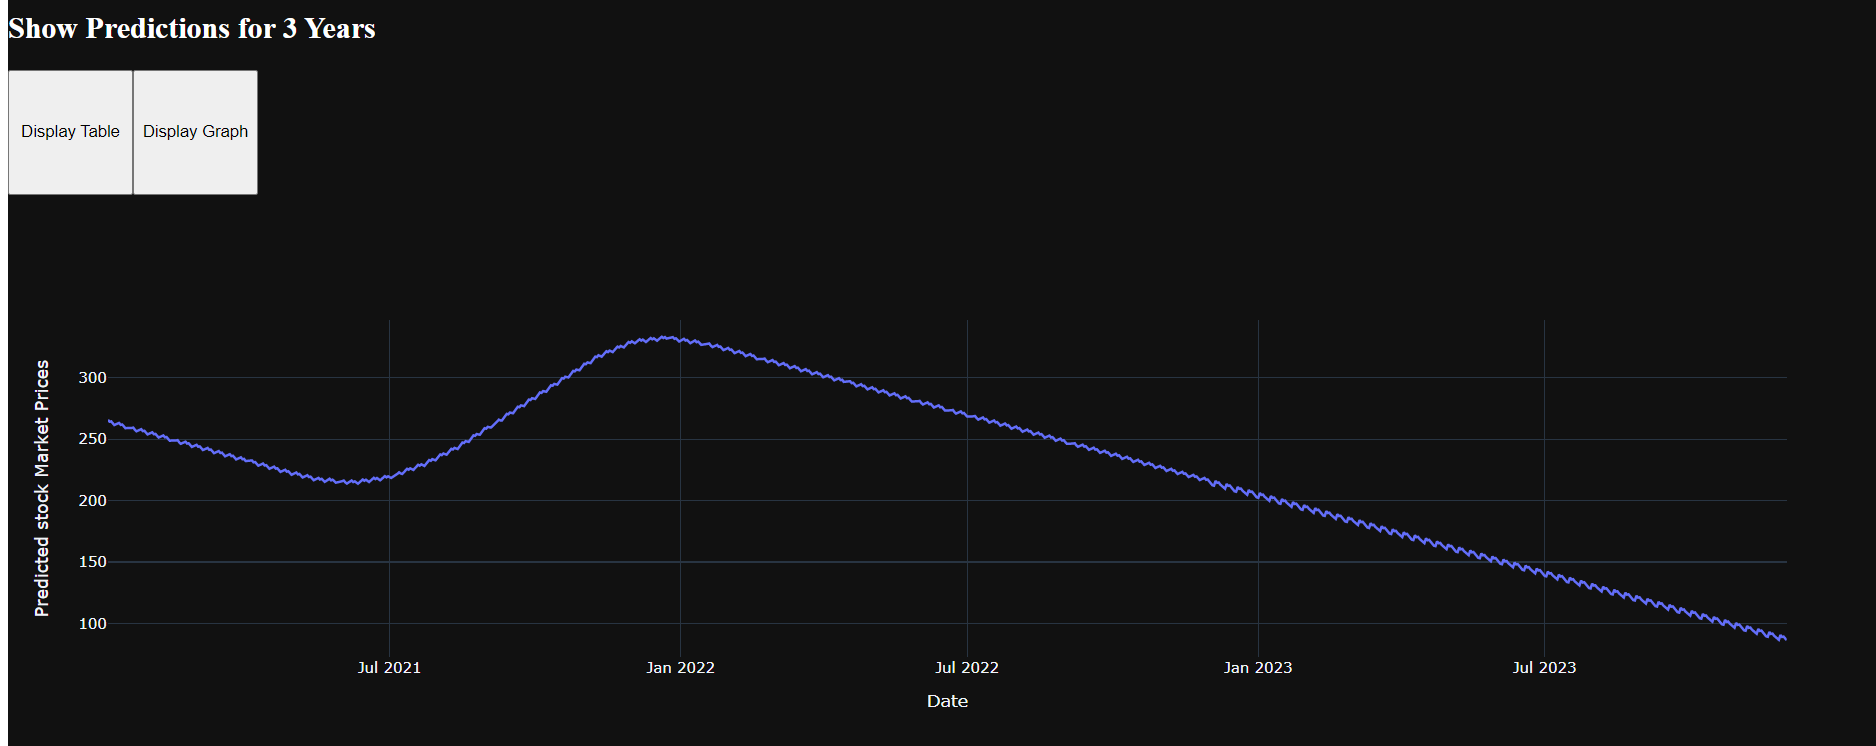

Similarly when ford selected

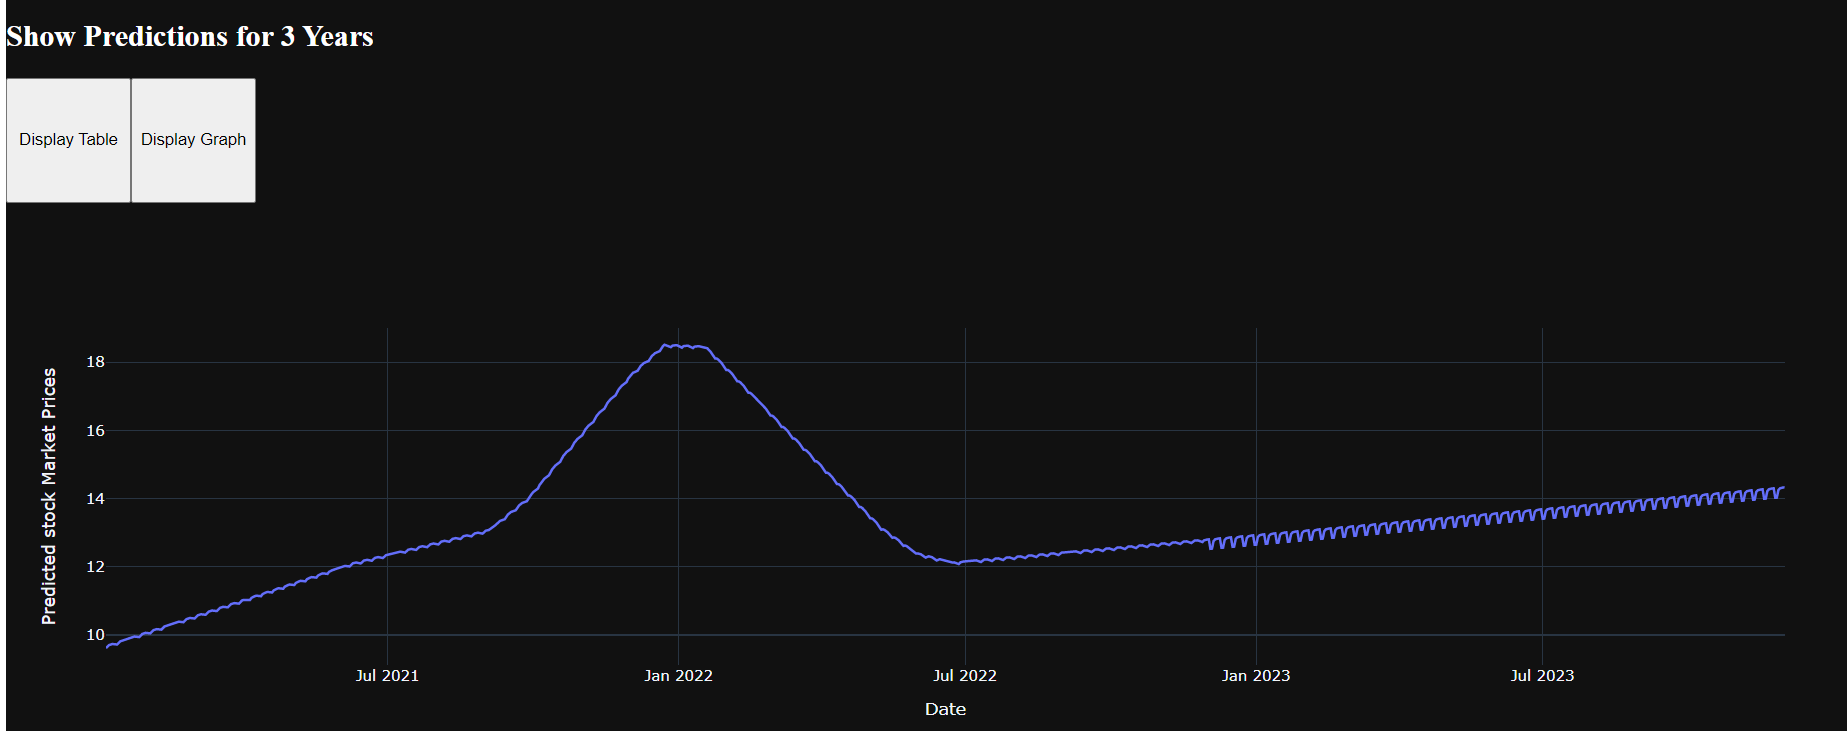

Buttons and input to enter date for which forecasting is to be made

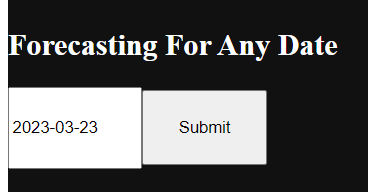

In [29]:
#2023-03-23 - todays date will be entered as default 


when values inputted and submit button pressed, prediction will be generated

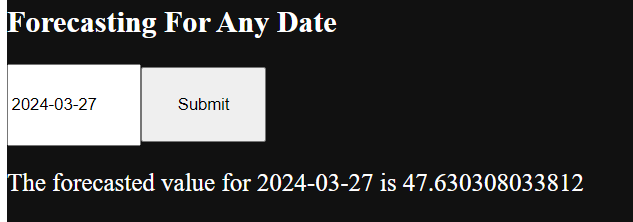

similarly for ford

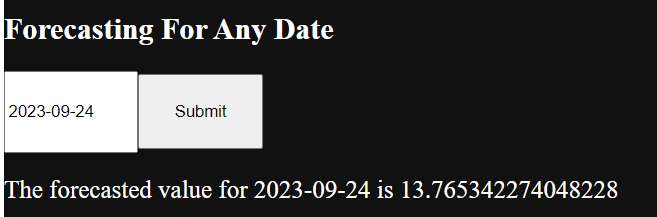